In [29]:
library(dplyr)
library(ggplot2)

df.hbw <- read.csv(paste("C:/Users/kevin/Desktop/",
                     "USP_587_data/HW2/household_hbw.csv", sep=""))

## Avg HBW Trips by Number of Workers

In [76]:
# HH Size only
df.pers <- df.hbw %>%
    select(hhwrk, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2)) %>%
    group_by(hhwrk) %>%
    mutate(avg_trips = mean(hbw))

summarize(df.pers, avg_trips = mean(hbw))


df.pers$ResError <- (df.pers$hbw - df.pers$avg_trips)^2
df.pers$TotError <- (df.pers$hbw - mean(df.pers$hbw))^2
SSE <- sum(df.pers$ResError)
SST <- sum(df.pers$TotError)
R2 <- 1 - (SSE/SST)

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("Adj R2 =", adj.R2, sep=" "))

k <- 3
n <- nrow(df.pers)
print(paste("n =", n, sep=" "))
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))

pers.fit <- lm(hbw ~ factor(hhwrk), data=df.pers)
summary(pers.fit)

hhwrk,avg_trips
0,0.0000000
1,0.5285321
2,1.1422638


[1] "SSE = 3459.71101965155"
[1] "SST = 4596.24158784308"
[1] "R2 = 0.247273896828578"
[1] "Adj R2 = 0.259275291665627"
[1] "n = 6449"



Call:
lm(formula = hbw ~ factor(hhwrk), data = df.pers)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1423 -0.5285 -0.1423  0.4715  3.8577 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -2.482e-16  2.295e-02    0.00        1    
factor(hhwrk)1  5.285e-01  2.717e-02   19.46   <2e-16 ***
factor(hhwrk)2  1.142e+00  2.669e-02   42.79   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7326 on 6446 degrees of freedom
Multiple R-squared:  0.2473,	Adjusted R-squared:  0.247 
F-statistic:  1059 on 2 and 6446 DF,  p-value: < 2.2e-16


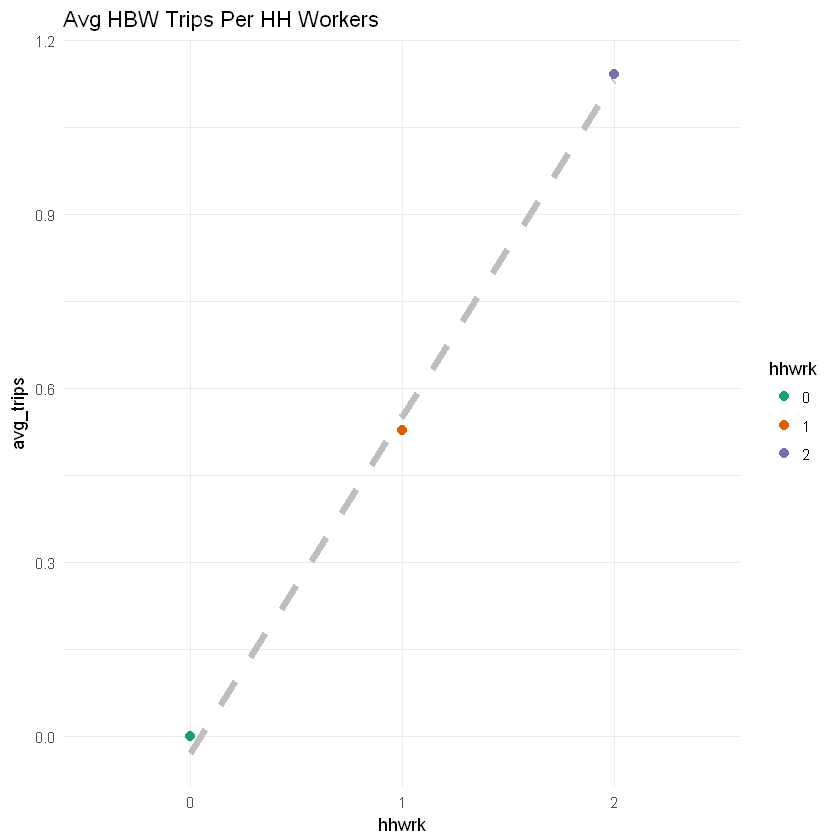

In [78]:
# Graph Avg Trips by # Workers
df.pers$hhwrk <- as.factor(df.pers$hhwrk)

df.pers %>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhwrk)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips Per HH Workers") +
    scale_color_brewer(palette="Dark2")

##  AVG TRIPS by Workers and Household Vehicles

In [67]:
df.persveh <- df.hbw %>%
    select(hhwrk, hhveh, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=1, `3`=1, `4`=1, `5`=1, 
                          `6`=1, `7`=1, `8`=1)) %>%
    group_by(hhwrk, hhveh) %>%
    mutate(avg_trips = mean(hbw))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$hbw - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$hbw - 
                           mean(df.persveh$hbw))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
k <- 6
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))

df.persveh.fit <- lm(hbw ~ factor(hhwrk) * factor(hhveh), data=df.persveh)
summary(df.persveh.fit)

[1] "SSE = 3441.91042899859"
[1] "SST = 4596.24158784308"
[1] "R2 = 0.251146754752329"
[1] "adj R2 = 0.250565527458595"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1476 -0.5460 -0.1476  0.4540  3.8524 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.553e-16  6.008e-02   0.000  1.00000    
factor(hhwrk)1                 2.716e-01  8.311e-02   3.268  0.00109 ** 
factor(hhwrk)2                 7.297e-01  1.343e-01   5.432 5.78e-08 ***
factor(hhveh)1                -1.496e-18  6.498e-02   0.000  1.00000    
factor(hhwrk)1:factor(hhveh)1  2.744e-01  8.801e-02   3.118  0.00183 ** 
factor(hhwrk)2:factor(hhveh)1  4.179e-01  1.373e-01   3.044  0.00235 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7309 on 6443 degrees of freedom
Multiple R-squared:  0.2511,	Adjusted R-squared:  0.2506 
F-statistic: 432.2 on 5 and 6443 DF,  p-value: < 2.2e-16


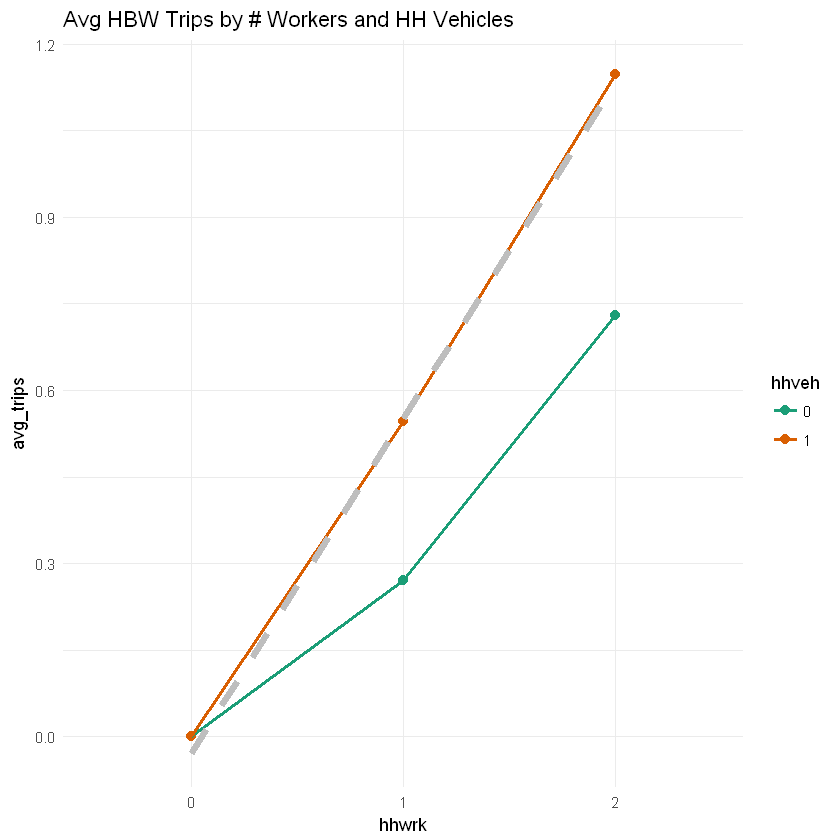

In [68]:
df.persveh$hhveh <- as.factor(df.persveh$hhveh)
df.persveh$hhwrk <- as.factor(df.persveh$hhwrk)

df.persveh%>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhveh, group=hhveh)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips by # Workers and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [73]:
df.persveh <- df.hbw %>%
    select(hhwrk, hhveh, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2, 
                          `6`=2, `7`=2, `8`=2)) %>%
    group_by(hhwrk, hhveh) %>%
    mutate(avg_trips = mean(hbw))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$hbw - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$hbw - 
                           mean(df.persveh$hbw))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
k <- 9
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))

df.persveh.fit <- lm(hbw ~ factor(hhwrk) * factor(hhveh), data=df.persveh)
summary(df.persveh.fit)

[1] "SSE = 3400.32504731596"
[1] "SST = 4596.24158784308"
[1] "R2 = 0.260194447500383"
[1] "adj R2 = 0.259275291665627"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1912 -0.5044  0.0000  0.4956  4.1569 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.116e-16  5.973e-02   0.000 1.000000    
factor(hhwrk)1                 2.716e-01  8.262e-02   3.287 0.001017 ** 
factor(hhwrk)2                 7.297e-01  1.336e-01   5.464 4.84e-08 ***
factor(hhveh)1                 8.907e-17  6.801e-02   0.000 1.000000    
factor(hhveh)2                 2.065e-16  7.062e-02   0.000 1.000000    
factor(hhwrk)1:factor(hhveh)1  2.328e-01  9.138e-02   2.548 0.010869 *  
factor(hhwrk)2:factor(hhveh)1  1.134e-01  1.427e-01   0.794 0.426934    
factor(hhwrk)1:factor(hhveh)2  3.123e-01  9.311e-02   3.354 0.000800 ***
factor(hhwrk)2:factor(hhveh)2  4.615e-01  1.395e-01   3.307 0.000948 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard

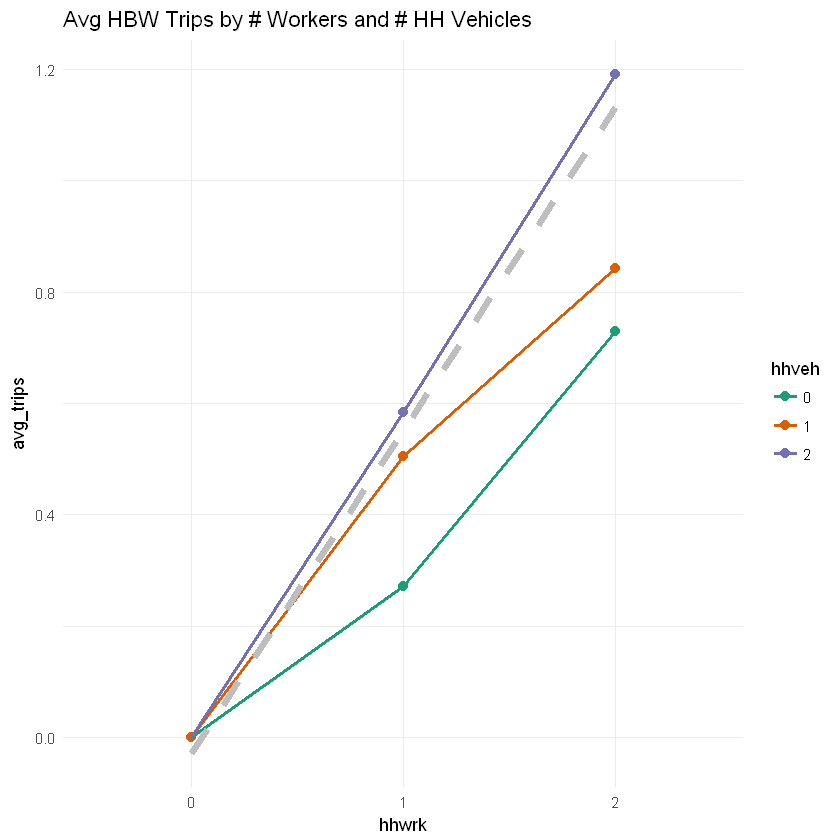

In [74]:
df.persveh$hhveh <- as.factor(df.persveh$hhveh)
df.persveh$hhwrk <- as.factor(df.persveh$hhwrk)

df.persveh%>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhveh, group=hhveh)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips by # Workers and # HH Vehicles") +
    scale_color_brewer(palette="Dark2")

## HBW Trips by HHWrk and Presence of Licensed Drivers

In [62]:
df.wrklic <- df.hbw %>%
    select(hhwrk, hhlic, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2)) %>%
    mutate(hhlic = recode(hhlic, `0`=0, `1`=1, `2`=1, `3`=1, `4`=1, `5`=1, 
                          `6`=1, `7`=1)) %>%
    group_by(hhwrk, hhlic) %>%
    mutate(avg_trips = mean(hbw))

# Manual Error calcs
df.wrklic$ResError <- (df.wrklic$hbw - 
                           df.wrklic$avg_trips)^2
df.wrklic$TotError <- (df.wrklic$hbw - 
                           mean(df.wrklic$hbw))^2
SSE <- sum(df.wrklic$ResError)
SST <- sum(df.wrklic$TotError)
R2 <- 1 - (SSE/SST)
k <- 8
n <- nrow(df.wrklic)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))

df.wrklic.fit <- lm(hbw ~ factor(hhwrk) * factor(hhlic), data=df.wrklic)
summary(df.wrklic.fit)

[1] "SSE = 3443.37200922528"
[1] "SST = 4596.24158784308"
[1] "R2 = 0.250828760104148"
[1] "adj R2 = 0.250014443539044"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhlic), data = df.wrklic)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1442 -0.5396 -0.1442  0.4604  3.8558 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.581e-16  7.347e-02   0.000  1.00000    
factor(hhwrk)1                 1.795e-01  1.107e-01   1.622  0.10492    
factor(hhwrk)2                -4.966e-15  3.351e-01   0.000  1.00000    
factor(hhlic)1                -1.340e-16  7.733e-02   0.000  1.00000    
factor(hhwrk)1:factor(hhlic)1  3.601e-01  1.142e-01   3.152  0.00163 ** 
factor(hhwrk)2:factor(hhlic)1  1.144e+00  3.362e-01   3.403  0.00067 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7311 on 6443 degrees of freedom
Multiple R-squared:  0.2508,	Adjusted R-squared:  0.2502 
F-statistic: 431.4 on 5 and 6443 DF,  p-value: < 2.2e-16


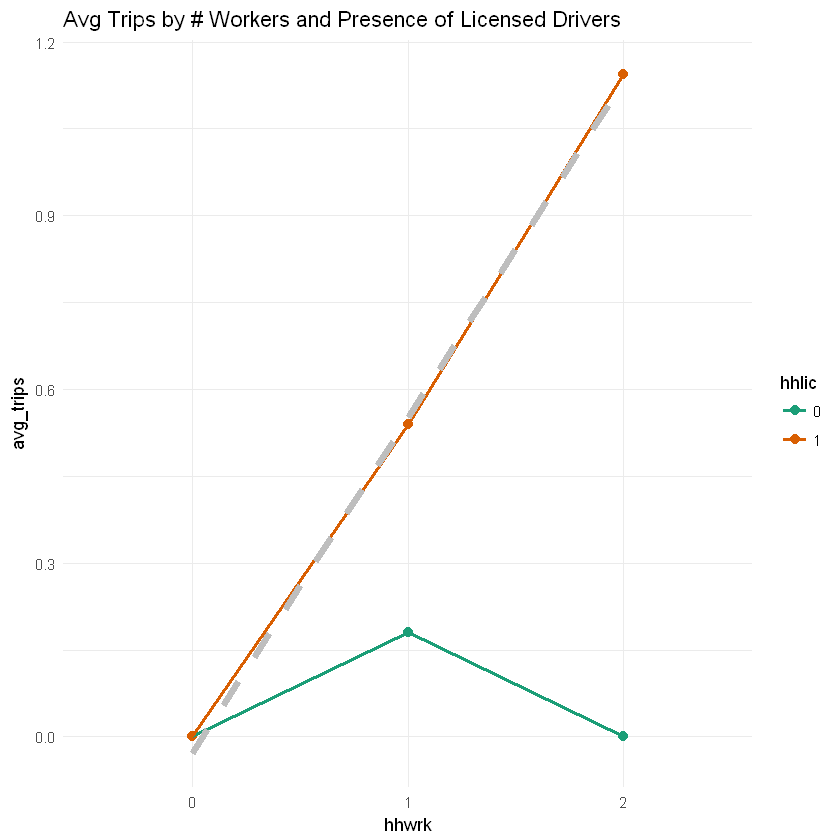

In [63]:
df.wrklic$hhwrk <- as.factor(df.wrklic$hhwrk)
df.wrklic$hhlic <- as.factor(df.wrklic$hhlic)

df.wrklic%>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhlic, group=hhlic)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhlic), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg HBW Trips by HH Workers and Presence of Licensed Drivers") +
    scale_color_brewer(palette="Dark2")

In [58]:
df.wrklic <- df.hbw %>%
    select(hhwrk, hhlic, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2)) %>%
    mutate(hhlic = recode(hhlic, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2, 
                          `6`=2, `7`=2)) %>%
    group_by(hhwrk, hhlic) %>%
    mutate(avg_trips = mean(hbw))

# Manual Error calcs
df.wrklic$ResError <- (df.wrklic$hbw - 
                           df.wrklic$avg_trips)^2
df.wrklic$TotError <- (df.wrklic$hbw - 
                           mean(df.wrklic$hbw))^2
SSE <- sum(df.wrklic$ResError)
SST <- sum(df.wrklic$TotError)
R2 <- 1 - (SSE/SST)
k <- 9
n <- nrow(df.wrklic)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))

df.wrklic.fit <- lm(hbw ~ factor(hhwrk) * factor(hhlic), data=df.wrklic)
summary(df.wrklic.fit)

[1] "SSE = 3426.62499260326"
[1] "SST = 4596.24158784308"
[1] "R2 = 0.254472392907593"
[1] "adj R2 = 0.253546127826565"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhlic), data = df.wrklic)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1557 -0.5022  0.0000  0.4978  3.8443 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -8.174e-17  7.331e-02   0.000 1.000000    
factor(hhwrk)1                 1.795e-01  1.104e-01   1.625 0.104157    
factor(hhwrk)2                 1.656e-16  3.344e-01   0.000 1.000000    
factor(hhlic)1                -2.112e-16  7.973e-02   0.000 1.000000    
factor(hhlic)2                 5.462e-17  8.235e-02   0.000 1.000000    
factor(hhwrk)1:factor(hhlic)1  3.228e-01  1.165e-01   2.770 0.005620 ** 
factor(hhwrk)2:factor(hhlic)1  7.619e-01  3.451e-01   2.208 0.027304 *  
factor(hhwrk)1:factor(hhlic)2  4.047e-01  1.186e-01   3.411 0.000652 ***
factor(hhwrk)2:factor(hhlic)2  1.156e+00  3.367e-01   3.432 0.000603 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard 

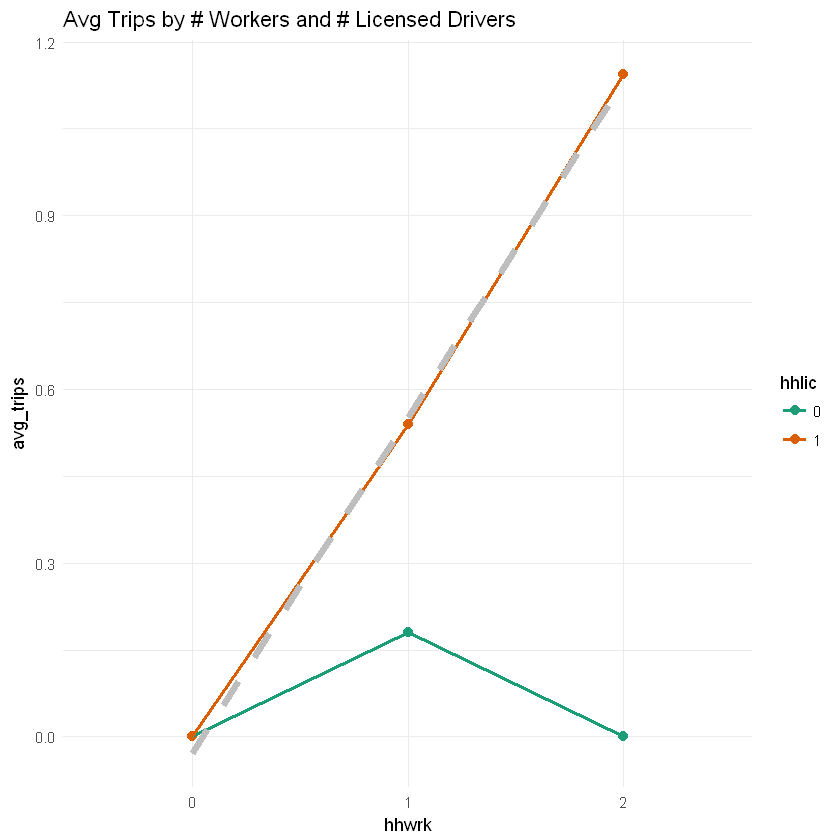

In [64]:
df.wrklic$hhwrk <- as.factor(df.wrklic$hhwrk)
df.wrklic$hhlic <- as.factor(df.wrklic$hhlic)

df.wrklic%>%
    ggplot(aes(x=hhwrk, y=avg_trips, color=hhlic, group=hhlic)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhwrk, y=avg_trips, color=hhlic), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by # Workers and # Licensed Drivers") +
    scale_color_brewer(palette="Dark2")

In [66]:
df.persveh <- df.hbw %>%
    select(hhwrk, hhveh, hbw) %>%
    mutate(hhwrk = recode(hhwrk, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=2, `4`=2, `5`=2, 
                          `6`=2, `7`=2, `8`=2)) %>%
    group_by(hhwrk, hhveh) %>%
    mutate(avg_trips = mean(hbw))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$hbw - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$hbw - 
                           mean(df.persveh$hbw))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
k <- 9
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2) * (k - 1) / (n - k - 1))

print(paste("SSE =", SSE, sep=" "))
print(paste("SST =", SST, sep=" "))
print(paste("R2 =", R2, sep=" "))
print(paste("adj R2 =", adj.R2, sep=" "))

df.persveh.fit <- lm(hbw ~ factor(hhwrk) * factor(hhveh), data=df.persveh)
summary(df.persveh.fit)

[1] "SSE = 3400.32504731596"
[1] "SST = 4596.24158784308"
[1] "R2 = 0.260194447500383"
[1] "adj R2 = 0.259275291665627"



Call:
lm(formula = hbw ~ factor(hhwrk) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1912 -0.5044  0.0000  0.4956  4.1569 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.116e-16  5.973e-02   0.000 1.000000    
factor(hhwrk)1                 2.716e-01  8.262e-02   3.287 0.001017 ** 
factor(hhwrk)2                 7.297e-01  1.336e-01   5.464 4.84e-08 ***
factor(hhveh)1                 8.907e-17  6.801e-02   0.000 1.000000    
factor(hhveh)2                 2.065e-16  7.062e-02   0.000 1.000000    
factor(hhwrk)1:factor(hhveh)1  2.328e-01  9.138e-02   2.548 0.010869 *  
factor(hhwrk)2:factor(hhveh)1  1.134e-01  1.427e-01   0.794 0.426934    
factor(hhwrk)1:factor(hhveh)2  3.123e-01  9.311e-02   3.354 0.000800 ***
factor(hhwrk)2:factor(hhveh)2  4.615e-01  1.395e-01   3.307 0.000948 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard

In [75]:
((3441.9 - 3400.3)/ (9-6)) / (3400.3/(6449-9-1))

[1] 26.2587